In [85]:
import pandas as pd


In [86]:
# Load the dataset
data = pd.read_csv('Crop and fertilizer dataset.csv')


In [87]:
#Count Null values
data.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       1
Link             0
dtype: int64

In [88]:
#No. of Rows and Columns
data.shape

(4534, 11)

In [89]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4534 non-null   object 
 1   Soil_color     4534 non-null   object 
 2   Nitrogen       4534 non-null   int64  
 3   Phosphorus     4534 non-null   int64  
 4   Potassium      4534 non-null   int64  
 5   pH             4534 non-null   float64
 6   Rainfall       4534 non-null   int64  
 7   Temperature    4534 non-null   int64  
 8   Crop           4534 non-null   object 
 9   Fertilizer     4533 non-null   object 
 10  Link           4534 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 389.8+ KB


In [90]:
#No. of Duplicates
data.duplicated().sum()

3

In [91]:
#Describe the data
data.describe()

Nitrogen   Phosphorus    Potassium           pH     Rainfall  \
count  4534.000000  4534.000000  4534.000000  4534.000000  4534.000000   
mean     95.199603    54.445523    63.403176     6.712616   818.041464   
std      38.097383    16.599499    35.726796     0.625147   251.728728   
min      20.000000    10.000000     5.000000     5.500000   300.000000   
25%      60.000000    40.000000    40.000000     6.000000   600.000000   
50%     105.000000    55.000000    55.000000     6.500000   800.000000   
75%     125.000000    65.000000    75.000000     7.000000  1000.000000   
max     150.000000   100.000000   150.000000     8.500000  1700.000000   

       Temperature  
count  4534.000000  
mean     25.917512  
std       5.885764  
min      10.000000  
25%      20.000000  
50%      25.000000  
75%      30.000000  
max      40.000000

In [92]:
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()

In [93]:
import seaborn as sns


<Axes: >

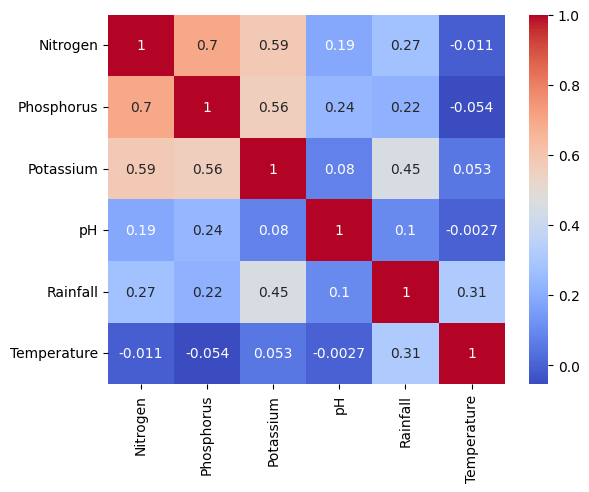

In [94]:
# Plot correlation heatmap
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle

In [96]:
# Prepare the data
X_categorical = data[['District_Name', 'Soil_color']]
X_numerical = data[['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
y = data[['Crop', 'Fertilizer']]

In [97]:
# Prepare the input data
input_categorical = pd.DataFrame({
    'District_Name': ["Kolhapur"],
    'Soil_color': ["Black"]
})

input_numerical = pd.DataFrame({
    'Nitrogen': [75],
    'Phosphorus': [50],
    'Potassium': [100],
    'pH': [6.5],
    'Rainfall': [1000],
    'Temperature': [20]
})

input_data = pd.concat([input_categorical, input_numerical], axis=1)

In [98]:
# Encode the categorical variables
categorical_columns = ['District_Name', 'Soil_color']
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
input_categorical_encoded = pd.DataFrame(encoder.transform(input_categorical).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

In [99]:
# Concatenate the encoded categorical variables with the numerical variables
X_encoded = pd.concat([X_categorical_encoded, X_numerical], axis=1)
input_encoded = pd.concat([input_categorical_encoded, input_numerical], axis=1)

In [100]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [101]:
# Train the model
model = RandomForestClassifier()
model.fit(X_test, y_test)

RandomForestClassifier()

In [102]:
# Save the trained model to a file
with open('model_pickle1.pkl', 'wb') as f:
    pickle.dump(model, f)


In [103]:
# Predict the output
prediction = model.predict(input_encoded)


In [104]:
# Print the predicted crop and fertilizer
output_crop = prediction[0][0]
output_fertilizer = prediction[0][1]
link = data[(data['Crop'] == output_crop) & (data['Fertilizer'] == output_fertilizer)]['Link'].values[0]

print("Predicted Crop:", output_crop)
print("Predicted Fertilizer:", output_fertilizer)
print("Link:", link)

Predicted Crop: Sugarcane
Predicted Fertilizer: DAP
Link: https://youtu.be/2t5Am0xLTOo
